<h1> Center Limit theorem & Confidence Interval </h1>
<br>1. Central Limit Theorem
<br>2. Confidence interval for mean
<br>3. Confidence interval for proportion

<h2> 1. Center Limit Theorem

In [1]:
# required libraries
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

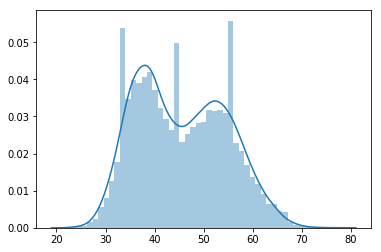

In [2]:
# When standard deviation of population is known

# generating data of age of people
np.random.seed(1)
age1 = stats.poisson.rvs(loc = 18 ,mu = 35, size = 10000)
age2 = stats.poisson.rvs(loc = 18 ,mu = 20, size = 10000)
population_age = np.concatenate((age1,age2))
sns.distplot(population_age)
plt.show()

 Difference between Population mean and sample mean : 0.035


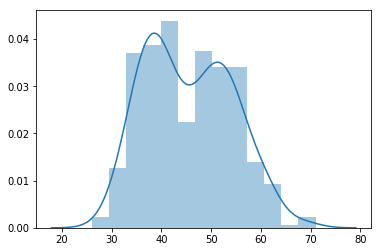

In [3]:
# sample of 500 age
np.random.seed(123)
n = 500
sample_age  = np.random.choice(population_age, size = n)

print(" Difference between Population mean and sample mean :", abs(round(population_age.mean() - sample_age.mean(),3)))
sns.distplot(sample_age)
plt.show()

 Difference between Population mean and sampling mean : 0.006


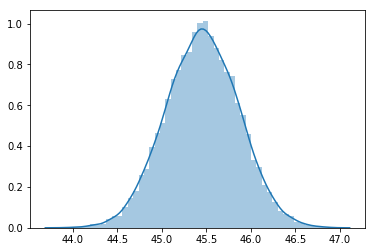

In [4]:
# Sampling distribution will have normal distribution

np.random.seed(123)
point_means = []

for sample in range(10000):
    sample  = np.random.choice(population_age, size = n,replace = True)
    sample_mean = sample.mean()
    point_means.append(sample_mean)
    
print(" Difference between Population mean and sampling mean :", abs(round(population_age.mean() - np.mean(point_means),3)))
sns.distplot(point_means)
plt.show()    

<h2> 2. Conidence Interval for mean

<b> Confidence Interval:
$$
Interval = x_{mean} \pm error
$$
<br>Error:
$$
error = Z_{\alpha/2} * \frac{\sigma}{\sqrt{n}}
$$

In [5]:
# Inferential stattistics for finding confidence interval of mean of population from a sample
 
# cofidence interva  = sample mean +- margine of error
# margine of error (statdard deviation od population is known)  = z_critical * P standard deviation / n **(1/2)
# margine of error (statdard deviation od population is unknown) = t_critical * s standard deviation / n **(1/2)

# population standard deviation is given 
population_std = population_age.std()
print('Population_std :',population_std)

# population mean ( not required just for varification)
population_mean = population_age.mean()


# taking 25 samples and doing inferential statistics on them
n= 29
means = []
z_intervals = []
t_intervals=[] # when n < 30 . when n > 30 its almost similar to narmal

# z_ critical and t_critical for 95% confidence interval 
z_critical = stats.norm.ppf(.975) # when population deviation is known
t_critical = stats.t.ppf(.975, df = n-1) # when population deviation is unknown ( use sample std in calculating error)

print("z_critical :",z_critical)
print("t_critical :",t_critical)

np.random.seed(123)

for sample in range(25):
    sample = np.random.choice(population_age, size= n, replace= False)
    sample_std = sample.std(ddof=1)
    sample_mean =  sample.mean()
    means.append(sample_mean)
    
    z_error = z_critical * population_std / np.sqrt(n)
    z_confidence=(sample_mean - z_error,sample_mean + z_error) 
    z_intervals.append(z_confidence)
    
    t_error = t_critical * sample_std / np.sqrt(n)
    t_confidence=(sample_mean - t_error, sample_mean + t_error) 
    t_intervals.append(t_confidence)
    

Population_std : 9.123564433789022
z_critical : 1.959963984540054
t_critical : 2.048407141795244


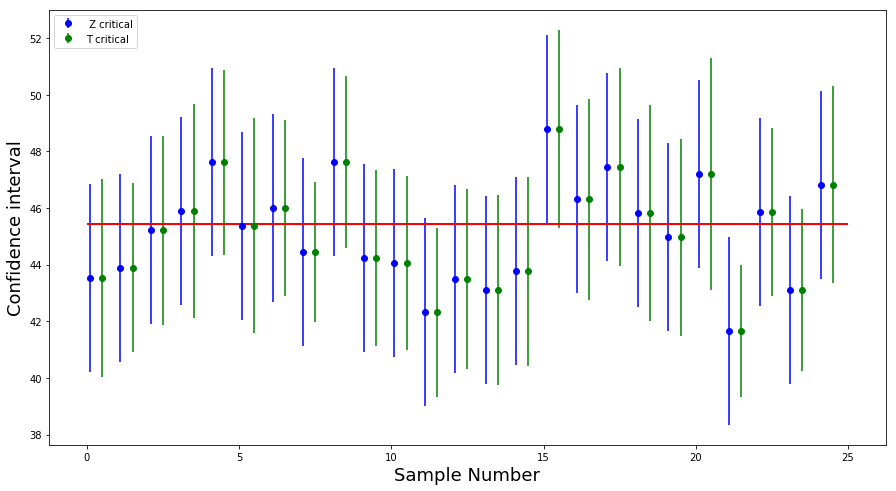

In [6]:
fig, ax = plt.subplots(figsize = (15,8))    

ax.errorbar(x=np.arange(0.1,25,1),
             y= means,
             yerr = [(top-bot)/2 for top,bot in z_intervals],
             fmt = 'o',color='blue',label =" Z critical")

ax.errorbar(x=np.arange(0.5,25,1),
             y= means,
             yerr = [(top-bot)/2 for top,bot in t_intervals],
             fmt = 'o',color= 'green',label = "T critical")
    
ax.hlines(xmin = 0,xmax=25,y = population_mean,linewidth = 2.0,color = 'red') 
plt.xlabel('Sample Number', fontsize=18)
plt.ylabel('Confidence interval', fontsize=18)
plt.legend(loc="upper left")
plt.show()

<h4>Using direct stats module function

In [7]:
sample = np.random.choice(population_age, size= n, replace= False)
sample_mean = sample.mean()
sample_std_error = sample.std() / np.sqrt(n) 

stats.t.interval(alpha = 0.95,
                 df = n-1,
                 loc = population_mean,
                 scale = sample_std_error)

(42.03841200196008, 48.85628799803992)

<h2> Confidence interval for proportion </h2>

<b> Confidence Interval:
$$
Interval = p \pm  error
$$
<br> Error :
$$
error  = z_{\alpha/2} * \sqrt{\frac{P (P-1)}{n}}
$$

In [8]:
population_color = ['red']* 2000 + ['blue']* 1000 + ['white']* 1000
N = len(population_color)
population_blue_ratio = population_color.count('white') / N
print('proportion of blue in population :',population_blue_ratio)

np.random.seed(1)
n= 500
sample = np.random.choice(population_color, size= n, replace= False)
p = list(sample).count('blue')/n
print('proportion of blue in sample :',p)


# standard deviation (standard error) of sample will be (p * q / n)**(1/2) # p = proportion , q = 1-p
std_error = np.sqrt(p * (1-p) / n)
print('std_error :',round(std_error,3))

# z critical for 95% confidence interval 
z_critical = stats.norm.ppf(0.975)
print('Z critical :',round(z_critical,3))

error = z_critical * std_error 
print('Error :',round(error,3))

# Confidence interval is sample proportion +- error
interval = (round(p-error,3),round(p+error,3))
print('interval :',interval)

proportion of blue in population : 0.25
proportion of blue in sample : 0.272
std_error : 0.02
Z critical : 1.96
Error : 0.039
interval : (0.233, 0.311)


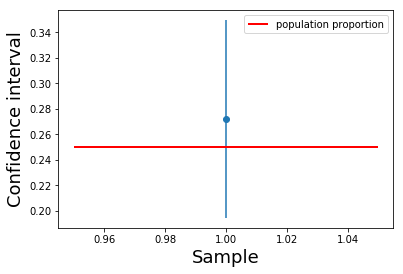

In [9]:
fig, ax = plt.subplots()    

ax.errorbar(x=1,y= p,yerr = interval[0]-interval[1]/2,fmt = 'o')
    
ax.hlines(xmin = 0.95,xmax=1.05,y = population_blue_ratio,linewidth = 2.0,color = 'red', label="population proportion") 
plt.xlabel('Sample', fontsize=18)
plt.ylabel('Confidence interval', fontsize=18)
plt.legend()
plt.show()

<h3> Using direct stats module function

In [10]:
stats.norm.interval(alpha = 0.95,
                    loc = p ,
                    scale = std_error)

(0.23299563332552195, 0.3110043666744781)